## Exam 20/03/2020


We work with the database ADNI, containing information for a clinical cohort of healhty volunteers and patients with Alzheimer's disease.

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('data.csv')
dataset[:10]

,Unnamed: 0,RID,Hippocampus_volume,AGE,PTGENDER,PTEDUCAT,ADAS11,FDG,DX
0,1,2,0.004200,74.3,1,16,10.67,1.369264,NL
1,16,3,0.002769,81.3,1,18,22.00,1.090790,Dementia
2,27,5,0.004312,73.7,1,16,8.67,1.297990,NL
3,46,8,0.004355,84.5,2,18,5.00,1.276278,NL
4,60,10,0.003728,73.9,2,12,12.33,1.118814,Dementia
5,65,14,0.005301,78.5,2,12,4.33,1.256990,NL
6,80,16,0.005406,65.4,1,9,10.33,1.395434,NL
7,93,21,0.005607,72.6,2,18,6.67,1.382790,NL
8,114,23,0.005298,71.7,1,14,4.00,1.364222,NL
9,221,43,0.004564,76.2,1,16,7.00,1.308406,NL


Data fields:
- RID: subject's identifier
- Hippocampus_volume = normalized volume of the brain region hippocampus
- AGE: subject's age
- PTGENDER: subject's sex (1 Male, 2 Female)
- PTEDUCAT: years of education
- ADAS11: clinical score (Alzheimer's disease assessment scale)
- FDG: measure of average brain metabolism
- DX: clinical diagnosis. In order to severity we have NL (normal), MCI (mild cognitive impairment), and Dementia

__Exercise 1.__ Estimate mean and standard deviation for the classification accuracy of the algorithm Logistic Regression classifier for predicting clinical diagnosis based on the variables Hippocampus_volume, AGE, PTGENDER. (use at least 1000 repetitions)

In [69]:
X = dataset[["Hippocampus_volume", "AGE", "PTGENDER"]]
y = pd.Categorical(dataset["DX"]).codes
y,X   # here I have the columns asked and the target variable

(array([2, 0, 2, ..., 2, 2, 2], dtype=int8),
       Hippocampus_volume   AGE  PTGENDER
 0               0.004200  74.3         1
 1               0.002769  81.3         1
 2               0.004312  73.7         1
 3               0.004355  84.5         2
 4               0.003728  73.9         2
 ...                  ...   ...       ...
 1130            0.005387  67.0         2
 1131            0.005554  74.3         2
 1132            0.005705  68.5         1
 1133            0.004147  75.5         2
 1134            0.005306  69.3         1
 
 [1135 rows x 3 columns])

In [70]:
#the libraries I need for the exercises
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


repetitions = 1000 # I'll do 1000 

#RepeatedKFold(n_repeats=1000, n_splits=2, random_state=None)
rk = RepeatedKFold(n_splits=2, n_repeats=repetitions)


#the vector were I will save
lr_vec = []

lr = LogisticRegression() 

#I use a for loop, so I can repeat many times and store the accuracy
for x_train, x_test in rk.split(X, y):
    X_train, y_train = X.iloc[x_train], y[x_train]
    X_test, y_test = X.iloc[x_test], y[x_test]
    
    #lr, here I fit and predict, after I append in the list the accuracy
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    lr_vec.append(accuracy_score(y_test, y_pred))

#lr_vec  here I can even print 

C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Raffaele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [71]:
import matplotlib.pyplot as plt

In [72]:
print("The mean of lr accuracy is :", np.mean(lr_vec))
print("The standart deviation is: ", np.std(lr_vec))

The mean of lr accuracy is : 0.49505393471942766
The standart deviation is:  0.013791127825536794


__Exercise 2__. Compute a 95% confidence interval for the median years of education in the group Dementia, and in the group healthy (NL). Are the median significantly different?  

In [74]:
X = dataset[["PTEDUCAT", "DX"]]
X_Dementia = X[X.DX == "Dementia"]
X_NL = X[X.DX == "NL"]
X_NL  ## here I take the variables I need 

,PTEDUCAT,DX
0,16,NL
2,16,NL
3,18,NL
5,12,NL
6,9,NL
...,...,...
1130,12,NL
1131,13,NL
1132,18,NL
1133,15,NL


Here I'm making the assumption of the Gaussianity of the distributions, or in case like the data are a loot, thx to the central limit theorem the data (n big > 30) is assimpotically distributed like a normal, so I can treat the data like normal.

To resolve the problem I will use boostrap

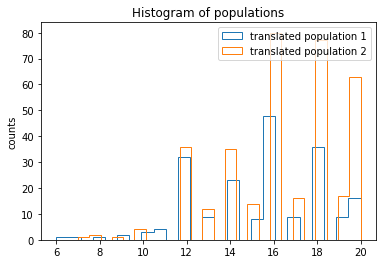

The median of x_tilde is: 16.0
The median of y_tilde is: 16.0

The variance of x_tilde is: 8.254386824821095
The variance of y_tilde is: 7.42908304984238

------------------------ 

The median of x is: 16.0
The median of y is: 16.0

The variance of x is: 8.254386824821095
The variance of y is: 7.42908304984238


In [75]:
#for my semplicity Ill take x and y like X_Dementia, X_NL

def compute_t(x,y):
    n = len(x)
    m = len(y)
    
    median_x = np.median(x)
    median_y = np.median(y)
    sigma2_x = np.var(x)
    sigma2_y = np.var(y)

    return( (median_x - median_y)/np.sqrt(sigma2_x/n + sigma2_y/m))

# Hypothesis testing
#  HO: median(X) = median(Y)
#  H1: median(X) != median(Y)

# Observed statistic t
t_obs = compute_t(X_Dementia["PTEDUCAT"], X_NL["PTEDUCAT"])

# Concatenated data for centering the distributions
z = np.concatenate([X_Dementia["PTEDUCAT"], X_NL["PTEDUCAT"]])

median_x = np.median(X_Dementia["PTEDUCAT"])
median_y = np.median(X_NL["PTEDUCAT"])


# Translating the data around avg(z)
x_tilde = X_Dementia["PTEDUCAT"] - median_x + np.median(z)
y_tilde = X_NL["PTEDUCAT"] - median_y + np.median(z)


plt.hist(x_tilde, 25, histtype='step', label = 'translated population 1')
plt.hist(y_tilde, 25, histtype='step', label = 'translated population 2')
plt.title('Histogram of populations')
plt.ylabel('counts')
plt.legend()
plt.show()


print('The median of x_tilde is: ' + str(np.median(x_tilde)))
print('The median of y_tilde is: ' + str(np.median(y_tilde)))

print('\nThe variance of x_tilde is: ' + str(np.var(x_tilde)))
print('The variance of y_tilde is: ' + str(np.var(y_tilde)))


print('\n------------------------ \n\nThe median of x is: ' + str(np.median(X_Dementia["PTEDUCAT"])))
print('The median of y is: ' + str(np.median(X_NL["PTEDUCAT"])))

print('\nThe variance of x is: ' + str(np.var(X_Dementia["PTEDUCAT"])))
print('The variance of y is: ' + str(np.var(X_NL["PTEDUCAT"])))

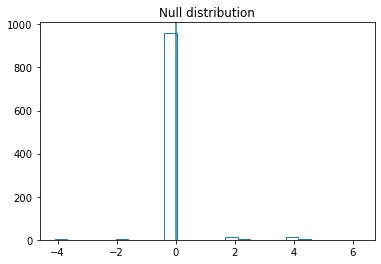

The bootstrap significance of the test is: 1.0


In [76]:
# We now concatenate the centered data and sample from it
z_tilde = np.concatenate([x_tilde, y_tilde])

# Number of bootstrap samples
B = 1000
n = len(X_Dementia["PTEDUCAT"]) ##I use n and m, for the two lengths
m = len(X_NL["PTEDUCAT"])

# We generate B samples 
b_sample = np.random.choice(z_tilde, (B, n+m), replace=True)  #with replacement

# For each pair of bootstrap samples we compute the associated statistic 
t_bootstrap = []

for i in range(B):
    x_simulated = b_sample[i,:n]
    y_simulated = b_sample[i,n:]
    
    t_bootstrap.append(compute_t(x_simulated, y_simulated))

# Plotting the null hypothesis distribution
plt.hist(t_bootstrap, 25, histtype='step')
plt.title('Null distribution')
plt.axvline(x = t_obs)
plt.show()

# Computing the significance of our test
bootstrap_stat = np.sum(np.abs(t_obs)>np.abs(t_bootstrap))/B

print('The bootstrap significance of the test is: ' + str(1-bootstrap_stat))

In [77]:
print('95% confidence interval for the null distribution: ',  np.quantile(t_bootstrap, [0.025, 0.975]))
print('observed statistic: ', t_obs)

95% confidence interval for the null distribution:  [0.         2.00682428]
observed statistic:  0.0


The significanze of the test is 1.0, so I don't have no provs to reject the null hyposis. t-test is inside of our 95% confidence interval.

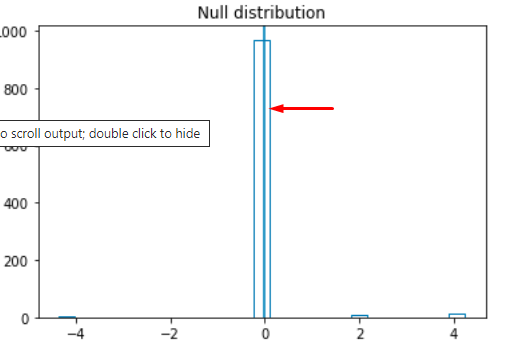
Like I see the line is inside, so I conferm what I said before, I don't have prove to reject H0

__Exercise 3__. Use the information criteria to decide what is the best polynomial model that explains the relatioship between ADAS11 (predictor) and FDG (target) in the group MCI? And in the group NL? 

In [78]:
def polynomial(x_data, y_data):   
    
    w = np.linalg.solve(x_data.T.dot(x_data), x_data.T.dot(y_data))
    w.reshape(1, (len(w)))
    sig2 = np.mean((y_data - x_data.dot(w.T)) ** 2)
    return w, sig2


def Gaussian_loglik(x_data, y_data, w, sig2):
    
    ll = -len(y_data) / 2 * np.log(2 * np.pi * sig2)  
    ll -= 1 / (2 * sig2) * np.sum((y_data - x_data.dot(w.T)) ** 2)  
    return ll

In [82]:
def inf_crit(subset):
    X = dataset[dataset["DX"] == subset][["ADAS11"]] ##predictor
    y = dataset[dataset["DX"] == subset]["FDG"]   # target
    
    #here I create the list that I will save all the information
    all_ll = []
    all_AIC = []
    all_AICc = []
    all_BIC = []
    n_params = np.arange(1, 7)
    #here I have the dimension, number of parameters, so I can choose later what is the best number of
    #parameters.
    
    for d in n_params:
        X_poly = np.array([X["ADAS11"] ** i for i in range(d)]).T
        w, sig2 = polynomial(X_poly, y)
        ll = Gaussian_loglik(X_poly, y, w, sig2)
        all_ll.append(ll)
        
        
    dev = -2 * np.array(all_ll)
    all_AIC.append(dev + 2 * n_params)
    all_AICc.append((dev + 2 * n_params) + (2 * n_params * (n_params + 1) / (len(X) - n_params - 1)))
    all_BIC.append(dev + 2 * n_params * np.log(len(X)))

    df_values = pd.DataFrame({"AIC": all_AIC[0], "AIC_c": all_AICc[0], "BIC": all_BIC[0]}, index=n_params,)
    return df_values

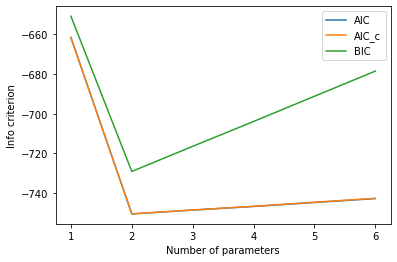

In [83]:
df_values= inf_crit(subset="MCI")
fig = plt.plot(df_values, label = ["AIC", "AIC_c", "BIC"])
plt.ylabel('Info criterion')
plt.xlabel('Number of parameters')
plt.legend()
plt.show()

Polynomial of degree 1, the lowest BIC (best), is with 2 parameters.

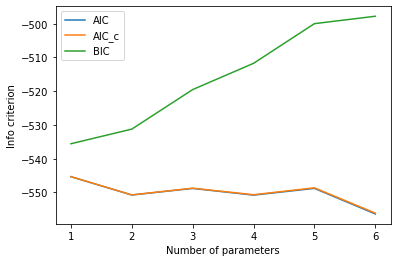

In [84]:
df_values = inf_crit(subset="NL")
fig = plt.plot(df_values, label = ["AIC", "AIC_c", "BIC"])
plt.ylabel('Info criterion')
plt.xlabel('Number of parameters')
plt.legend()
plt.show()

Polinomial 0, lowest BIC (best), is with 1 parameter

__Exercise 4__. What is the best combination of variables (excluded RID and DX) for predicting ADAS11 with a linear model?

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from itertools import combinations



# here I define the X variables (features)
features = ["Hippocampus_volume", "AGE", "PTGENDER", "PTEDUCAT", "FDG"]

# here I define the y (target)
target = "ADAS11"

# here I create all the  possible combinations of predictor variables
combs = []
for i in range(1, len(features) + 1):
    combs += list(combinations(features, i))

# here I define a function to calculate the R-squared value of a linear model
def calculate_r_squared(features, target):
    X = dataset[list(features)]
    y = dataset[target]
    model = LinearRegression().fit(X, y)# fitting the model
    r_squared = model.score(X, y)
    return r_squared # return R^2

# Here with a for loop I see the combination of predictor variables with the highest R-squared value
best_combination = None
best_r_squared = 0
for comb in combs:
    r_squared = calculate_r_squared(comb, target)
    print(comb, r_squared) ###here I'm going to print the combination and the R-squared (I want to be
    #sure is doing all the combinations)
    if r_squared > best_r_squared:
        best_combination = comb
        best_r_squared = r_squared

# Here I print the best combination of predictor variables and its R-squared value
print("Best combination of X variables:", best_combination)
print("R-squared value:", best_r_squared)

('Hippocampus_volume',) 0.2553667566493365
('AGE',) 0.015365184910843599
('PTGENDER',) 0.008184001805461416
('PTEDUCAT',) 0.017250617691962344
('FDG',) 0.3588886297190461
('Hippocampus_volume', 'AGE') 0.2614095577148453
('Hippocampus_volume', 'PTGENDER') 0.25554466333676207
('Hippocampus_volume', 'PTEDUCAT') 0.269922160085559
('Hippocampus_volume', 'FDG') 0.4270501315658558
('AGE', 'PTGENDER') 0.021225667419196514
('AGE', 'PTEDUCAT') 0.029672030272519412
('AGE', 'FDG') 0.3631208323927466
('PTGENDER', 'PTEDUCAT') 0.03061700869028594
('PTGENDER', 'FDG') 0.3593962169358649
('PTEDUCAT', 'FDG') 0.36725188310895573
('Hippocampus_volume', 'AGE', 'PTGENDER') 0.2615125572928847
('Hippocampus_volume', 'AGE', 'PTEDUCAT') 0.2780425924208738
('Hippocampus_volume', 'AGE', 'FDG') 0.4285537250999696
('Hippocampus_volume', 'PTGENDER', 'PTEDUCAT') 0.27000755900757334
('Hippocampus_volume', 'PTGENDER', 'FDG') 0.42757939582881466
('Hippocampus_volume', 'PTEDUCAT', 'FDG') 0.4359203093636539
('AGE', 'PTGEND

Like I see it does all the combinations and give to us the best value with the combinations

__Open question__. Is it true that a model with the lowest AIC is the best one? 

It is not always the case. 

From the lesson we observe that the AIC gets closer to the testing deviance when the sample size increases. This is a known property as AIC is a realiable approximation when:

- The sample size $N$ is _much_ greater than the number of parameters $d$
- The predictive distribution is approximatively Gaussian
- The prior are overwhelmed by the likelihood

When there are few observations (usually when the number of observations divided by the number of parameters is less than 40), the AICc might be a better choice than other criteria. Like AIC, BIC also considers the number of parameters used in the model when assessing model fit. However, BIC imposes a greater penalty on the likelihood increase due to the number of parameters compared to AIC.